In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('kc_house_data 3.csv')

In [110]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [111]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,13.047817
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.526685
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,11.225243
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,12.682152
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,13.017003
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,13.377006
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,15.856731


In [3]:
from datetime import datetime

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


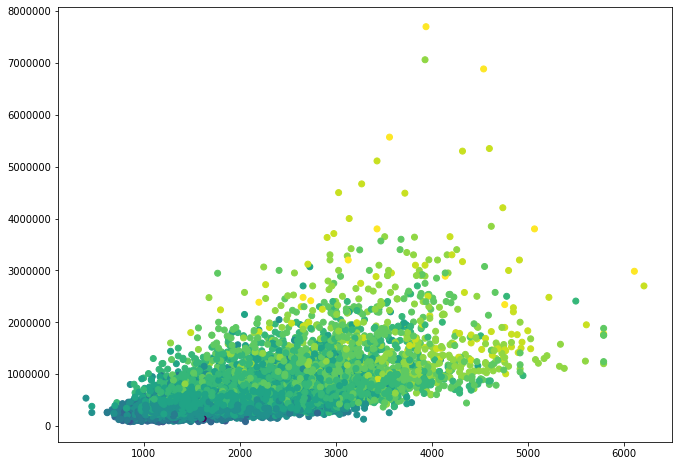

In [117]:
plt.figure(figsize=(11, 8))
plt.scatter(df['sqft_living15'], df['price'], c=df['grade']);

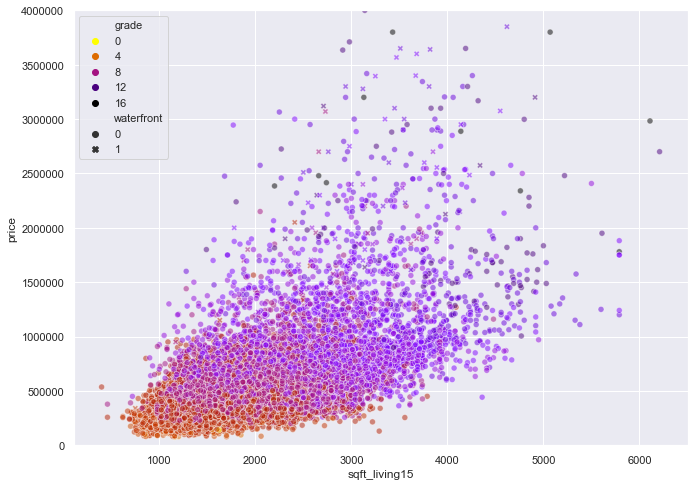

In [9]:
plt.figure(figsize=(11, 8), edgecolor='r')
sns.set(style='darkgrid')
sns.scatterplot(df['sqft_living15'], df['price'], style=df['waterfront'], sizes=300, palette = 'gnuplot_r', hue=df['grade'], alpha=.5);
plt.ylim(0, 4000000);

In [5]:
dfwater = df[df['waterfront'] == 1]
dfdesert = df[df['waterfront'] == 0]
dfren= df[df['yr_renovated'] > 0]

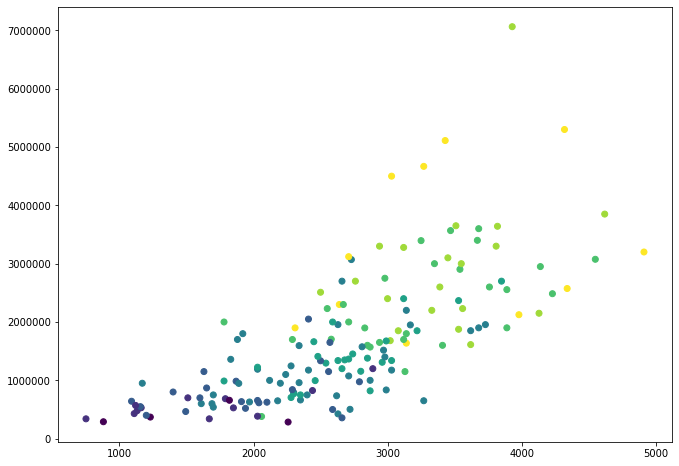

In [154]:
plt.figure(figsize=(11, 8))
plt.scatter(dfwater['sqft_living15'], dfwater['price'], c=dfwater['grade']);

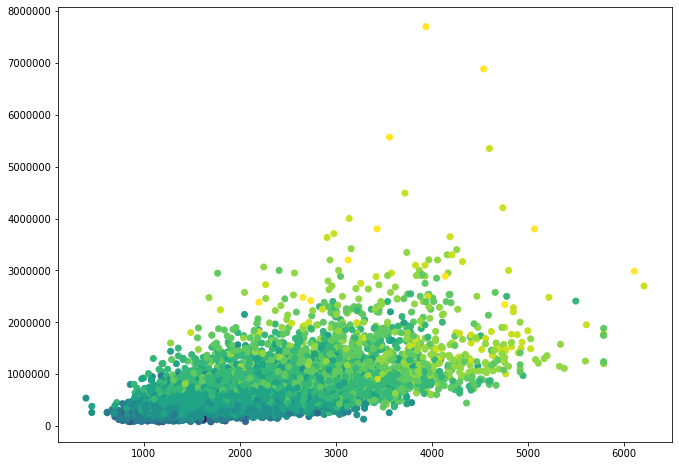

In [155]:
plt.figure(figsize=(11, 8))
plt.scatter(dfdesert['sqft_living15'], dfdesert['price'], c=dfdesert['grade']);

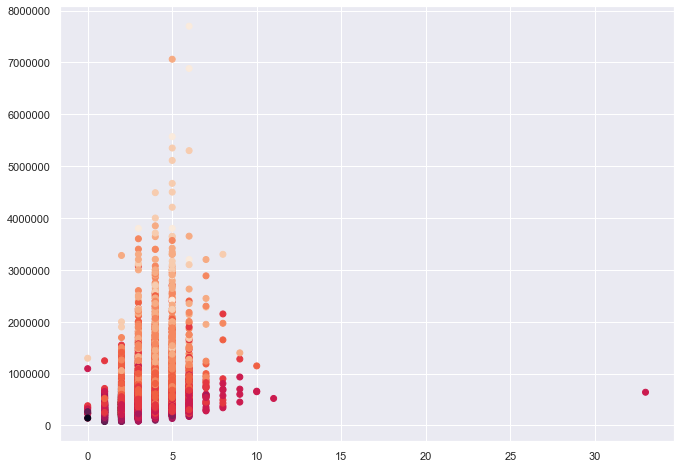

In [173]:
plt.figure(figsize=(11, 8))
plt.scatter(df['bedrooms'], df['price'], c=df['grade']);

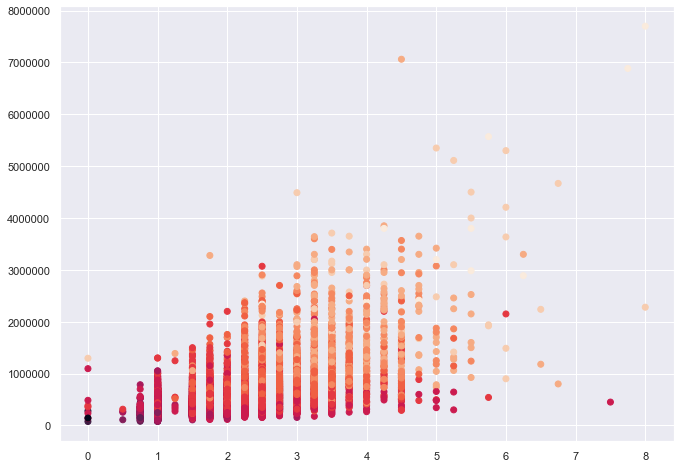

In [174]:
plt.figure(figsize=(11, 8))
plt.scatter(df['bathrooms'], df['price'], c=df['grade']);

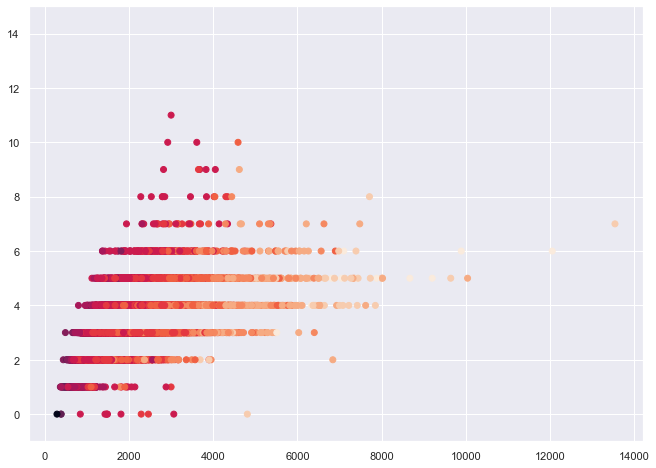

In [22]:
plt.figure(figsize=(11, 8))
plt.scatter(df['sqft_living'], df['bedrooms'], c=df['grade']);
plt.ylim(-1,15);

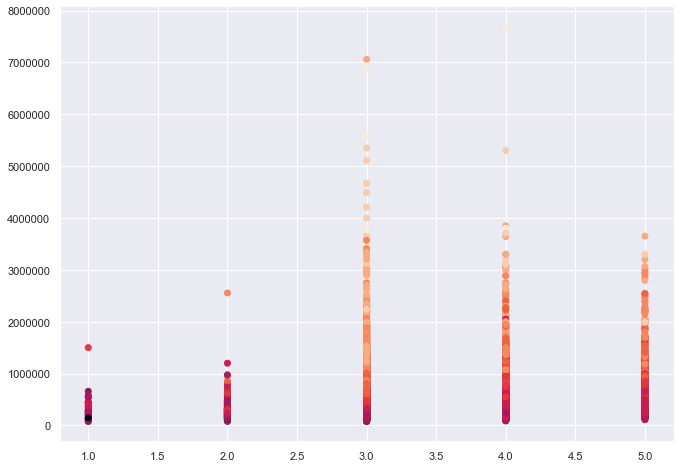

In [176]:
plt.figure(figsize=(11, 8))
plt.scatter(df['condition'], df['price'], c=df['grade']);

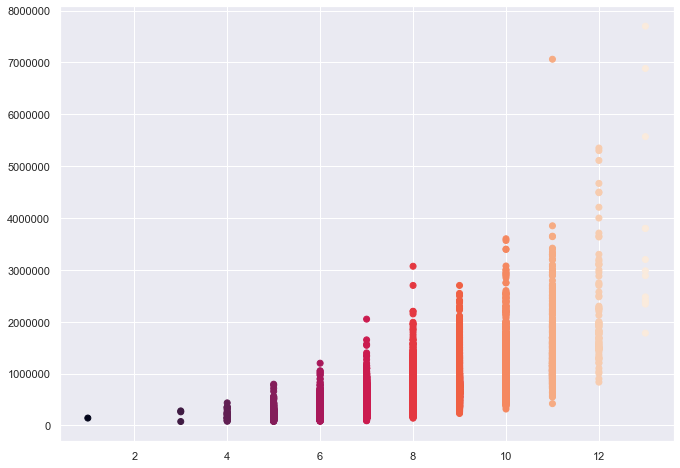

In [177]:
plt.figure(figsize=(11, 8))
plt.scatter(df['grade'], df['price'], c=df['grade']);

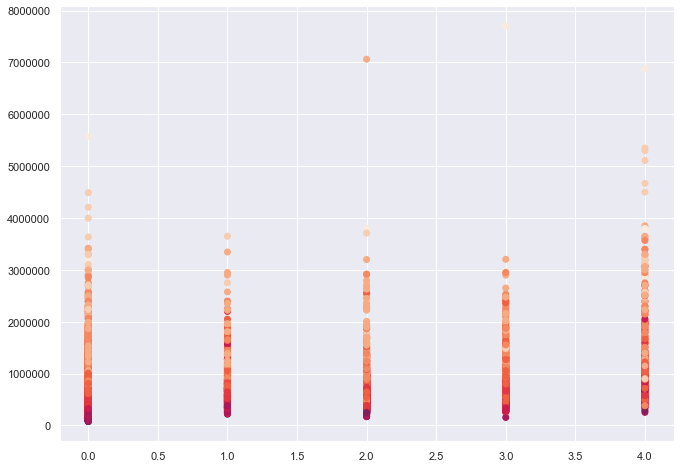

In [178]:
plt.figure(figsize=(11, 8))
plt.scatter(df['view'], df['price'], c=df['grade']);

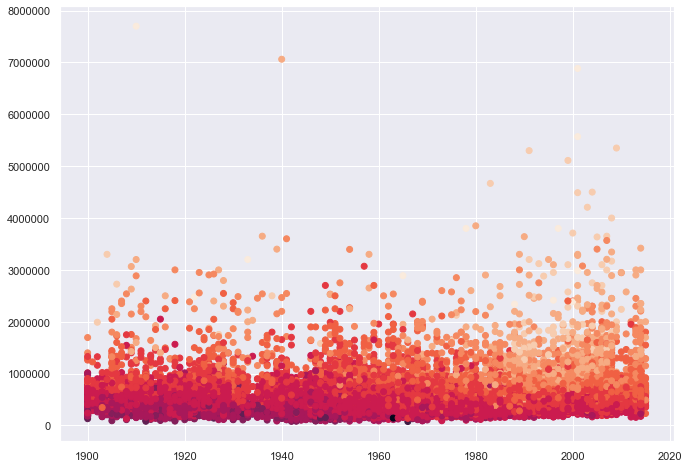

In [179]:
plt.figure(figsize=(11, 8))
plt.scatter(df['yr_built'], df['price'], c=df['grade']);

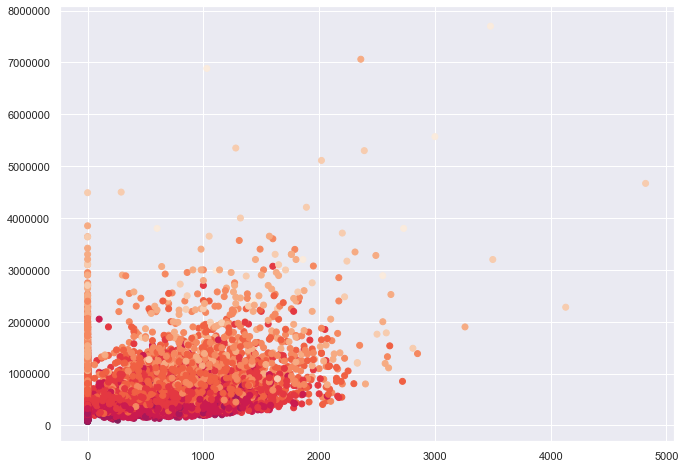

In [180]:
plt.figure(figsize=(11, 8))
plt.scatter(df['sqft_basement'], df['price'], c=df['grade']);

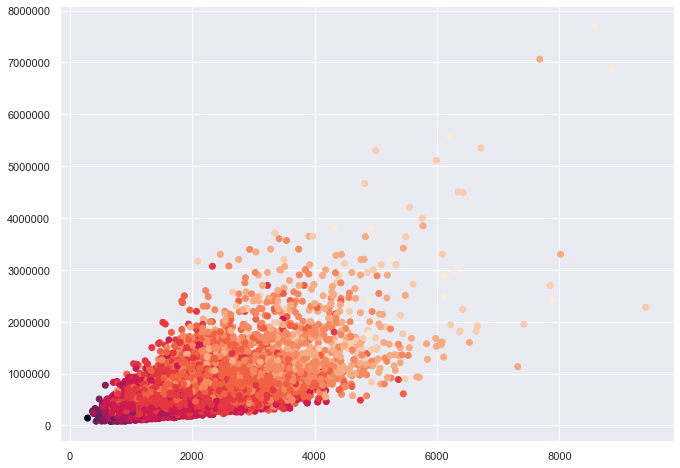

In [181]:
plt.figure(figsize=(11, 8))
plt.scatter(df['sqft_above'], df['price'], c=df['grade']);

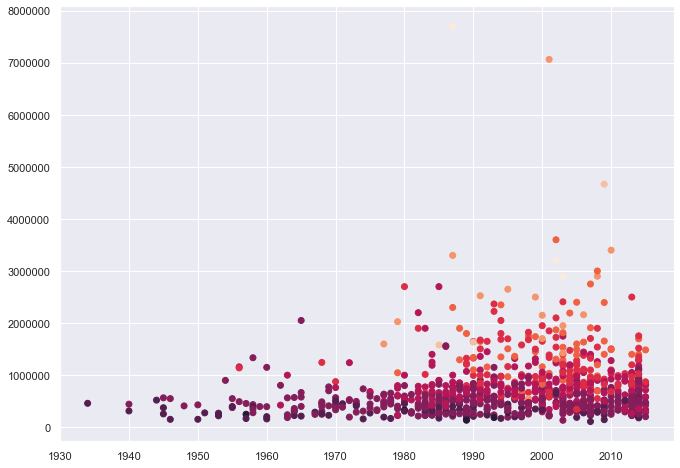

In [186]:
plt.figure(figsize=(11, 8))
plt.scatter(dfren['yr_renovated'], dfren['price'], c=dfren['grade']);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26e93710>,
      dtype=object)

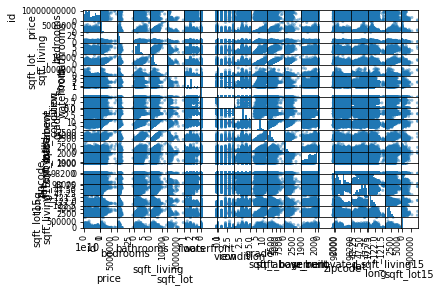

In [6]:
pd.plotting.scatter_matrix(df)

In [8]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

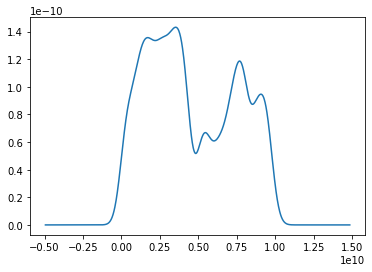

In [6]:
df.plot.kde()

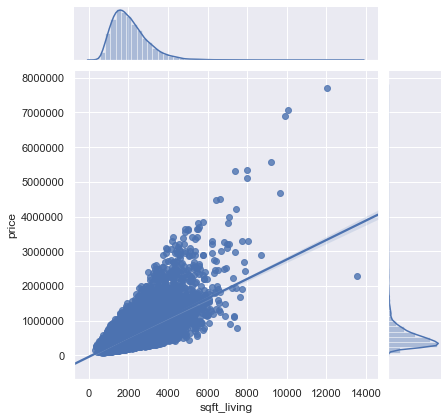

In [13]:
sns.jointplot(df['sqft_living'], df['price'],kind = 'reg');

In [14]:
df['price_log'] = np.log(df['price'])

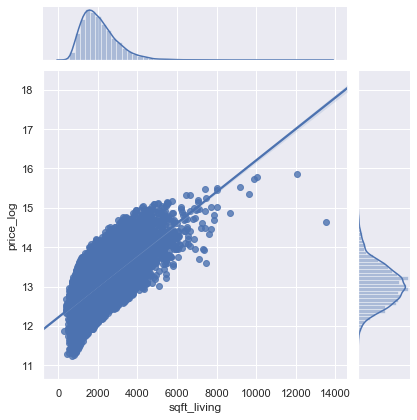

In [15]:
sns.jointplot(df['sqft_living'], df['price_log'],kind = 'reg');

In [10]:
f = 'price~sqft_living'

In [12]:
model = ols(formula=f, data=df).fit()

In [ ]:
model.summary()

In [46]:
f = 'price~sqft_living'
model = ols(formula=f, data=dfin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.936e+04
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:04:50   Log-Likelihood:            -2.9807e+05
No. Observations:               21543   AIC:                         5.962e+05
Df Residuals:                   21541   BIC:                         5.962e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.276e+04   4278.404     -2.982      0.003   -2.11e+04   -4372.622
sqft_living   264.7016      1.903    139.133      0.000     260.972     268.431
==============================================================================
Omnibus:                    11137.341   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145004.615
Skew:                           2.184   Prob(JB):                         0.00
Kurtosis:                      14.936   Cond. No.                     5.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df['bedrooms'] = df['bedrooms'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['grade'] = df['grade'].astype('category')
df['condition'] = df['condition'].astype('category')

df['floors'] = df['floors'].astype('category')
df['zipcode'] = df['zipcode'].astype('category')

In [11]:
dfbed = pd.get_dummies(df['bedrooms'], prefix='bed', drop_first=True)
dfwater = pd.get_dummies(df['waterfront'], prefix='water', drop_first=True)
dfgrade = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
dfcond = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)
dfbath = pd.get_dummies(df['bathrooms'], prefix='bath', drop_first=True)
dffl = pd.get_dummies(df['floors'], prefix='fl', drop_first=True)
dfzip = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)

In [29]:
dfdum = df.drop(['bedrooms', 'id', 'bathrooms', 'date', 'waterfront', 'grade', 'condition', 'floors', 'zipcode', 'lat', 'long','view'], axis=1)
dfdum = pd.concat([dfdum, dfbed, dfwater, dfgrade, dfcond, dfzip], axis=1)

In [30]:
dfdum.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bed_1,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,12.309982,1180,5650,1180,0,1955,0,1340,5650,0,...,0,0,0,0,0,0,1,0,0,0
1,13.195614,2570,7242,2170,400,1951,1991,1690,7639,0,...,0,0,0,0,0,0,0,0,0,0
2,12.100712,770,10000,770,0,1933,0,2720,8062,0,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,1960,5000,1050,910,1965,0,1360,5000,0,...,0,0,0,0,0,0,0,0,0,0
4,13.142166,1680,8080,1680,0,1987,0,1800,7503,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dfdum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Columns: 107 entries, id to zip_98199
dtypes: float64(1), int64(9), uint8(97)
memory usage: 3.6 MB


In [46]:
cols = '+'.join(dfdum.columns[9:])

In [47]:
cols

'bed_1+bed_2+bed_3+bed_4+bed_5+bed_6+bed_7+bed_8+bed_9+bed_10+bed_11+bed_33+water_1+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13+cond_2+cond_3+cond_4+cond_5+zip_98002+zip_98003+zip_98004+zip_98005+zip_98006+zip_98007+zip_98008+zip_98010+zip_98011+zip_98014+zip_98019+zip_98022+zip_98023+zip_98024+zip_98027+zip_98028+zip_98029+zip_98030+zip_98031+zip_98032+zip_98033+zip_98034+zip_98038+zip_98039+zip_98040+zip_98042+zip_98045+zip_98052+zip_98053+zip_98055+zip_98056+zip_98058+zip_98059+zip_98065+zip_98070+zip_98072+zip_98074+zip_98075+zip_98077+zip_98092+zip_98102+zip_98103+zip_98105+zip_98106+zip_98107+zip_98108+zip_98109+zip_98112+zip_98115+zip_98116+zip_98117+zip_98118+zip_98119+zip_98122+zip_98125+zip_98126+zip_98133+zip_98136+zip_98144+zip_98146+zip_98148+zip_98155+zip_98166+zip_98168+zip_98177+zip_98178+zip_98188+zip_98198+zip_98199'

In [48]:
z = 'price~sqft_living+{}'.format(cols)
model = ols(formula=z, data=dfdum).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1377.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:49:45   Log-Likelihood:                 4632.5
No. Observations:               21613   AIC:                            -9067.
Df Residuals:                   21514   BIC:                            -8277.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.2979      0.197     57.283      0.000      10.911      11.685
sqft_living     0.0002   2.83e-06     86.583      0.000       0.000       0.000
bed_1           0.0241      0.059      0.412      0.680      -0.091       0.139
bed_2           0.0424      0.057      0.743      0.457      -0.069       0.154
bed_3           0.0653      0.057      1.146      0.252      -0.046       0.177
bed_4           0.0723      0.057      1.268      0.205      -0.039       0.184
bed_5           0.0336      0.057      0.588      0.557      -0.079       0.146
bed_6          -0.0006      0.058     -0.010      0.992      -0.115       0.114
bed_7          -0.1608      0.065     -2.456      0.014      -0.289      -0.032
bed_8          -0.1087      0.079     -1.377      0.169      -0.264       0.046
bed_9          -0.1485      0.099     -1.507      0.132      -0.342       0.045
bed_10         -0.2560      0.127     -2.018      0.044      -0.505      -0.007
bed_11          0.2192      0.204      1.073      0.283      -0.181       0.619
bed_33          0.1717      0.204      0.841      0.400      -0.228       0.572
water_1         0.6673      0.016     41.820      0.000       0.636       0.699
grade_3         0.2156      0.238      0.907      0.364      -0.250       0.682
grade_4         0.1980      0.210      0.941      0.347      -0.214       0.610
grade_5         0.2029      0.209      0.973      0.331      -0.206       0.612
grade_6         0.2977      0.208      1.428      0.153      -0.111       0.706
grade_7         0.4109      0.208      1.972      0.049       0.002       0.819
grade_8         0.5253      0.208      2.520      0.012       0.117       0.934
grade_9         0.6595      0.209      3.162      0.002       0.251       1.068
grade_10        0.7402      0.209      3.548      0.000       0.331       1.149
grade_11        0.8019      0.209      3.839      0.000       0.392       1.211
grade_12        0.8288      0.210      3.953      0.000       0.418       1.240
grade_13        0.8343      0.216      3.857      0.000       0.410       1.258
cond_2          0.0899      0.040      2.274      0.023       0.012       0.167
cond_3          0.1987      0.037      5.403      0.000       0.127       0.271
cond_4          0.2527      0.037      6.865      0.000       0.181       0.325
cond_5          0.3132      0.037      8.459      0.000       0.241       0.386
zip_98002      -0.0369      0.017     -2.128      0.033      -0.071      -0.003
zip_98003       0.0141      0.016      0.902      0.367      -0.017       0.045
zip_98004       1.1182      0.015     73.411      0.000       1.088       1.148
zip_98005       0.7353      0.018     39.963      0.000       0.699       0.771
zip_98006       0.6500      0.014     47.318      0.000       0.623       0.677
zip_98007       0.6432      0.020     32.96

In [34]:
k = 'price~sqft_living15+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13'
model = ols(formula=k, data=dfdum).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1979.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:45:45   Log-Likelihood:                -8794.2
No. Observations:               21613   AIC:                         1.761e+04
Df Residuals:                   21600   BIC:                         1.772e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.5697      0.364     31.813      0.000      10.857      12.283
sqft_living15     0.0002   5.25e-06     34.578      0.000       0.000       0.000
grade_3           0.3006      0.420      0.716      0.474      -0.522       1.123
grade_4           0.3312      0.370      0.896      0.371      -0.394       1.056
grade_5           0.5032      0.364      1.381      0.167      -0.211       1.217
grade_6           0.7221      0.364      1.985      0.047       0.009       1.435
grade_7           0.9622      0.364      2.646      0.008       0.249       1.675
grade_8           1.1913      0.364      3.276      0.001       0.479       1.904
grade_9           1.4435      0.364      3.969      0.000       0.731       2.156
grade_10          1.6820      0.364      4.623      0.000       0.969       2.395
grade_11          1.9208      0.364      5.274      0.000       1.207       2.635
grade_12          2.2201      0.366      6.069      0.000       1.503       2.937
grade_13          2.7315      0.378      7.236      0.000       1.992       3.472
==============================================================================
Omnibus:                       69.948   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.418
Skew:                           0.137   Prob(JB):                     5.12e-16
Kurtosis:                       2.941   Cond. No.                     1.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
dfbeds = df[]

In [ ]:
k = 'price~sqft_living15+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13'
model = ols(formula=k, data=dfdum).fit()
model.summary()

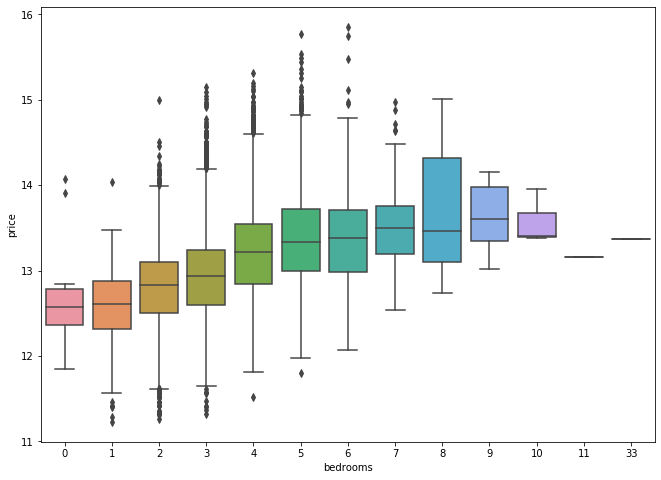

In [56]:
plt.figure(figsize=(11,8))
sns.boxplot(df['bedrooms'], df['price'])

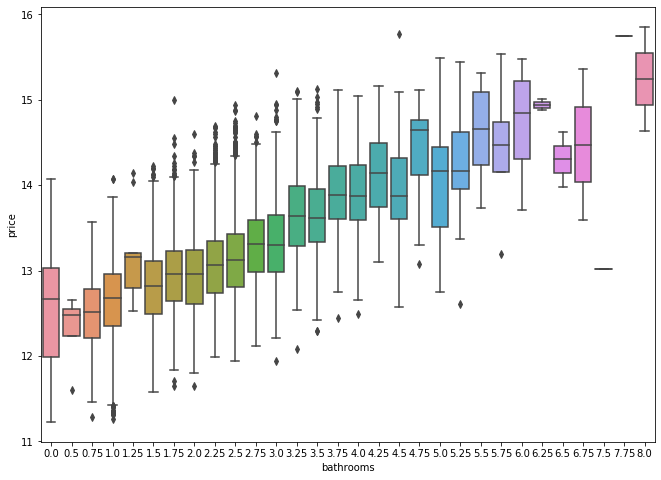

In [57]:
plt.figure(figsize=(11,8))
sns.boxplot(df['bathrooms'], df['price'])

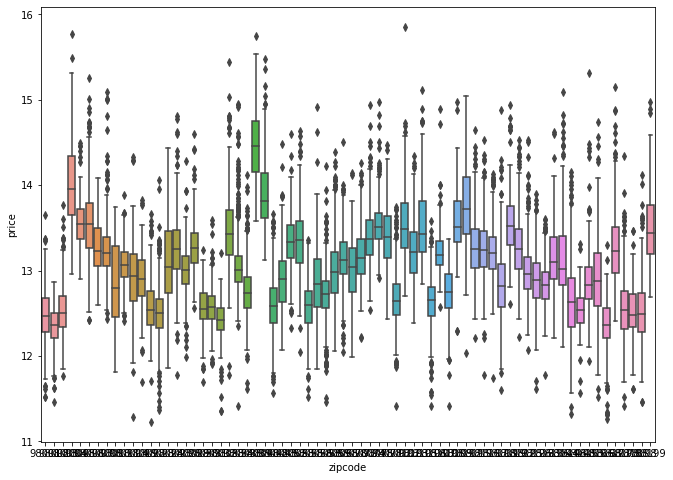

In [55]:
plt.figure(figsize=(11,8))
sns.boxplot(df['zipcode'], df['price'])

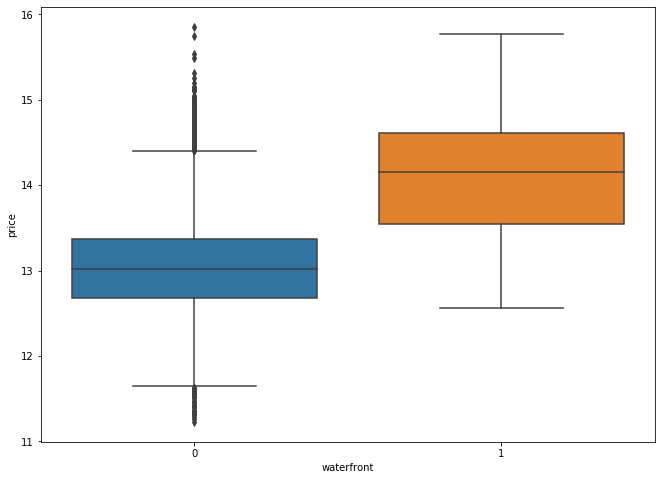

In [58]:
plt.figure(figsize=(11,8))
sns.boxplot(df['waterfront'], df['price'])

In [60]:
df['price'].()

11.225243392518447

In [59]:
dfexp = df[df['price'] > 2000000]
dfbro = df[df['bedrooms'] > 7]
dfsink= df[df['bathrooms'] >= 5]
dfout = pd.concat([dfexp, dfbro, dfsink])

In [60]:
dfout

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
153,7855801670,2015-04-01,2250000.0,4,3.25,5180,19850,2.0,0,3,...,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750,14.626441
246,2025069065,2014-09-29,2400000.0,4,2.50,3650,8354,1.0,1,4,...,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841,14.690979
269,7960900060,2015-05-04,2900000.0,4,3.25,5050,20100,1.5,0,2,...,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060,14.880221
282,7424700045,2015-05-13,2050000.0,5,3.00,3830,8480,2.0,0,1,...,2630,1200,1905,1994,98122,47.6166,-122.287,3050,7556,14.533350
300,3225069065,2014-06-24,3075000.0,4,5.00,4550,18641,1.0,1,4,...,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508,14.938815
312,1860600135,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,...,3370,280,1921,0,98119,47.6345,-122.367,2880,5400,14.684290
518,4386700135,2014-11-14,2250000.0,4,2.25,4760,8036,2.5,0,0,...,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323,14.626441
540,622049114,2015-02-18,2125000.0,3,2.50,5403,24069,2.0,1,4,...,5403,0,1976,0,98166,47.4169,-122.348,3980,104374,14.569282
656,3760500116,2014-11-20,3070000.0,3,2.50,3930,55867,1.0,1,4,...,2330,1600,1957,0,98034,47.7022,-122.224,2730,26324,14.937188
779,1954700695,2014-06-12,2250000.0,5,4.25,4860,9453,1.5,0,1,...,3100,1760,1905,0,98112,47.6196,-122.286,3150,8557,14.626441


In [56]:
dfin = df[(df['price'] <= 2000000) & (df['bedrooms'] <= 7) & (df['bathrooms'] < 5)]

In [57]:
dfin

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,14.018451
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,12.458775
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,12.583995
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,12.343658
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,12.685408


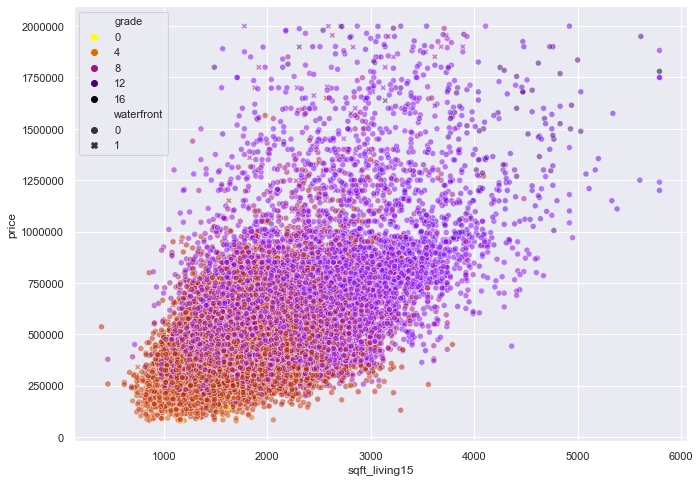

In [58]:
plt.figure(figsize=(11, 8), edgecolor='r')
sns.set(style='darkgrid')
sns.scatterplot(dfin['sqft_living15'], dfin['price'], style=dfin['waterfront'], sizes=300, palette = 'gnuplot_r', hue=dfin['grade'], alpha=.5);


In [61]:
dfin.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
count,2.135900e+04,2.135900e+04,21359.000000,21359.000000,21359.000000,2.135900e+04,21359.000000,21359.000000,21359.000000,21359.000000,...,21359.000000,21359.000000,21359.000000,21359.000000,21359.000000,21359.000000,21359.000000,21359.000000,21359.000000,21359.000000
mean,4.585667e+09,5.180382e+05,3.352311,2.091964,2045.919519,1.492937e+04,1.489934,0.005478,0.216490,3.408774,...,1762.801629,283.117889,1970.983426,82.039983,98078.106981,47.559446,-122.213739,1970.653823,12646.977527,13.029741
std,2.876823e+09,2.857840e+05,0.883617,0.734755,852.270924,4.086379e+04,0.539364,0.073811,0.730297,0.649865,...,785.244239,428.433344,29.299772,396.257971,53.488682,0.139067,0.141202,666.415991,26637.382564,0.499315
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,11.225243
25%,2.124079e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469050,-122.329000,1480.000000,5100.000000,12.676076
50%,3.904990e+09,4.499500e+05,3.000000,2.250000,1900.000000,7.575000e+03,1.500000,0.000000,0.000000,3.000000,...,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.231000,1830.000000,7600.000000,13.016892
75%,7.314800e+09,6.350000e+05,4.000000,2.500000,2520.000000,1.053100e+04,2.000000,0.000000,0.000000,4.000000,...,2180.000000,550.000000,1996.500000,0.000000,98118.000000,47.678400,-122.124000,2340.000000,10018.500000,13.361380
max,9.900000e+09,2.000000e+06,7.000000,4.750000,7620.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,14.508658


In [62]:
dfin['bedrooms'] = dfin['bedrooms'].astype('category')
dfin['waterfront'] = dfin['waterfront'].astype('category')
dfin['grade'] = dfin['grade'].astype('category')
dfin['condition'] = dfin['condition'].astype('category')

dfin['floors'] = dfin['floors'].astype('category')
dfin['zipcode'] = dfin['zipcode'].astype('category')

/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [63]:
dfinbed = pd.get_dummies(dfin['bedrooms'], prefix='bed', drop_first=True)
dfinwater = pd.get_dummies(dfin['waterfront'], prefix='water', drop_first=True)
dfingrade = pd.get_dummies(dfin['grade'], prefix='grade', drop_first=True)
dfincond = pd.get_dummies(dfin['condition'], prefix='cond', drop_first=True)
dfinbath = pd.get_dummies(dfin['bathrooms'], prefix='bath', drop_first=True)
dfinfl = pd.get_dummies(dfin['floors'], prefix='fl', drop_first=True)
dfinzip = pd.get_dummies(dfin['zipcode'], prefix='zip', drop_first=True)

In [64]:
dfindum = dfin.drop(['bedrooms', 'id', 'bathrooms', 'date', 'waterfront', 'grade', 'condition', 'floors', 'zipcode', 'lat', 'long','view'], axis=1)
dfindum = pd.concat([dfindum, dfinbed, dfinwater, dfingrade, dfincond, dfinzip], axis=1)

In [69]:
col = '+'.join(dfindum.columns[10:30])
col

'price_log+bed_1+bed_2+bed_3+bed_4+bed_5+bed_6+bed_7+water_1+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13+cond_2'

In [78]:
col = '+'.join(dfindum.columns[10:])
g = 'price_log~sqft_living15+{}'.format(col)
model = ols(formula=g, data=dfindum).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1083.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:44:30   Log-Likelihood:                 3182.2
No. Observations:               21359   AIC:                            -6176.
Df Residuals:                   21265   BIC:                            -5427.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.0256      0.211     52.347      0.000      10.613      11.438
sqft_living15     0.0002    3.5e-06     56.032      0.000       0.000       0.000
bed_1            -0.0489      0.063     -0.782      0.434      -0.172       0.074
bed_2             0.0213      0.061      0.349      0.727      -0.098       0.141
bed_3             0.1040      0.061      1.707      0.088      -0.015       0.223
bed_4             0.1790      0.061      2.939      0.003       0.060       0.298
bed_5             0.2144      0.061      3.508      0.000       0.095       0.334
bed_6             0.2650      0.062      4.254      0.000       0.143       0.387
bed_7             0.2266      0.072      3.153      0.002       0.086       0.367
water_1           0.6800      0.020     33.996      0.000       0.641       0.719
grade_3           0.4180      0.254      1.647      0.100      -0.079       0.915
grade_4           0.3233      0.225      1.440      0.150      -0.117       0.763
grade_5           0.3822      0.223      1.717      0.086      -0.054       0.819
grade_6           0.5090      0.222      2.288      0.022       0.073       0.945
grade_7           0.6633      0.222      2.981      0.003       0.227       1.099
grade_8           0.8179      0.223      3.676      0.000       0.382       1.254
grade_9           0.9996      0.223      4.491      0.000       0.563       1.436
grade_10          1.1380      0.223      5.111      0.000       0.702       1.574
grade_11          1.2574      0.223      5.641      0.000       0.820       1.694
grade_12          1.4003      0.224      6.244      0.000       0.961       1.840
grade_13          1.4957      0.306      4.892      0.000       0.896       2.095
cond_2            0.1277      0.042      3.023      0.003       0.045       0.210
cond_3            0.2449      0.039      6.236      0.000       0.168       0.322
cond_4            0.3039      0.039      7.729      0.000       0.227       0.381
cond_5            0.3815      0.040      9.648      0.000       0.304       0.459
zip_98002        -0.0106      0.019     -0.570      0.569      -0.047       0.026
zip_98003         0.0031      0.017      0.187      0.851      -0.030       0.036
zip_98004         1.0605      0.017     63.088      0.000       1.028       1.093
zip_98005         0.6868      0.020     34.835      0.000       0.648       0.725
zip_98006         0.5828      0.015     39.298      0.000       0.554       0.612
zip_98007         0.5909      0.021     28.373      0.000       0.550       0.632
zip_98008         0.6237      0.017     37.274      0.000       0.591       0.656
zip_98010         0.2982      0.024     12.614      0.000       0.252       0.345
zip_98011         0.4230      0.019     22.727      0.000       0.387       0.459
zip_98014         0.4018      0.022     18.372   

In [ ]:
model.

In [104]:
model.outlier_test()

/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/statsmodels/stats/multitest.py:153: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/s

,student_resid,unadj_p,bonf(p)
0,-0.746341,0.455470,1.0
1,1.275125,0.202279,1.0
2,-3.045398,0.002327,1.0
3,0.529447,0.596501,1.0
4,0.452758,0.650728,1.0
5,-1.124125,0.260973,1.0
6,-0.099265,0.920929,1.0
7,0.684788,0.493485,1.0
8,-1.650878,0.098778,1.0
9,0.056366,0.955051,1.0


(array([1.0636e+04, 0.0000e+00, 1.8970e+03, 0.0000e+00, 8.0690e+03,
        0.0000e+00, 1.4100e+02, 0.0000e+00, 6.0900e+02, 7.0000e+00]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ]),
 <a list of 10 Patch objects>)

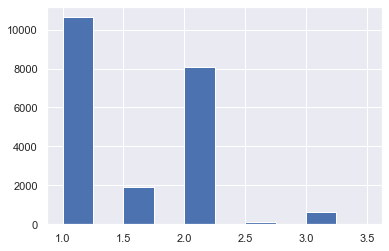

In [100]:
plt.hist(dfin['floors'])


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler as SS
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split

In [145]:
y = dfindum['price_log']
X = pd.concat([dfindum['sqft_living15'], dfinbed, dfingrade, dfincond, dfinzip], axis=1)


st_transformed = SS().fit_transform(X)
st_X = pd.DataFrame(st_transformed, columns = X.columns)

mms_trans = MMS().fit_transform(X)
mms_X = pd.DataFrame(mms_trans, columns = X.columns)

In [226]:
X_train , X_test, y_train, y_test = train_test_split(st_X, y, test_size=0.2)

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)


lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)


lin = LinearRegression()
lin.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [227]:
coef = {}
for b, i, n in zip(ridge.coef_, lasso.coef_, X.columns):
    coef[n] = [b, i]

In [228]:
ridge_train = ridge.predict(X_train)
ridge_test = ridge.predict(X_test)

lasso_train = lasso.predict(X_train)
lasso_test = lasso.predict(X_test)

lin_train = lin.predict(X_train)
lin_test = lin.predict(X_test)

In [229]:
print('Train Error Ridge Model', np.sum((y_train - ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin_train**2)))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin_test**2)))

Train Error Ridge Model 771.8693899950975
Test Error Ridge Model 210.72050049846297


Train Error Lasso Model 2229.8499687896724
Test Error Lasso Model 590.2760969638504


Train Error Unpenalized Linear Model -2682570.466955801
Test Error Unpenalized Linear Model -4.262028981114624e+25
